In [118]:
pip install pyLIMA

Note: you may need to restart the kernel to use updated packages.


In [119]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from pyLIMA.fits import DE_fit
from pyLIMA.fits import TRF_fit
from pyLIMA.models import PSPL_model
from pyLIMA.models import FSPL_model
from pyLIMA.models import DSPL_model
from pyLIMA.models import USBL_model, pyLIMA_fancy_parameters
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import PSPL_model
from pyLIMA.fits import LM_fit 

# Data

In [120]:
# data of OGLE-2005-BLG-390, from Ogle Public Database (https://ogle.astrouw.edu.pl/ogle3/ews/2005/blg-390.html)
# Column 1 = date (Julian date), Column 2 = magnitude (mag), Column 3 = magnitude uncertainty (mag)

In [121]:
file = open('OGLE-2005-BLG-390_Data1.csv', 'r')
t, m, m_error  = np.loadtxt('OGLE-2005-BLG-390_Data1.csv', delimiter=",", skiprows=1, usecols=(0,1,2), unpack=True)

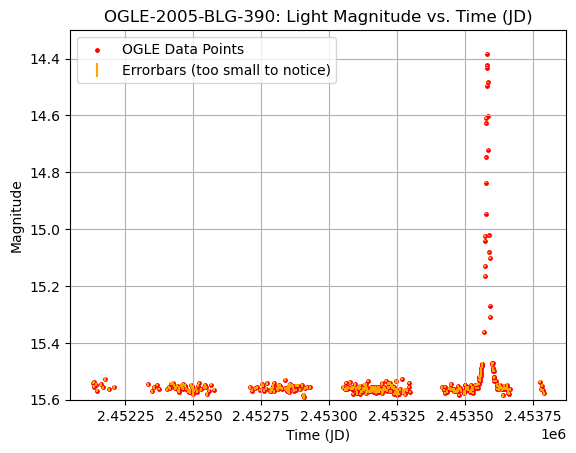

In [122]:
plt.figure()
plt.grid()
plt.ylim(15.6, 14.3)
plt.title('OGLE-2005-BLG-390: Light Magnitude vs. Time (JD)')
plt.xlabel('Time (JD)')
plt.ylabel('Magnitude')

plt.scatter(t, m, s=6, color='red', label='OGLE Data Points')
plt.errorbar(t, m, yerr=m_error, fmt='none', color='orange', label='Errorbars (too small to notice)')

plt.legend()
plt.show()

In [123]:
# pyLima requires an event
myEvent = event.Event(ra=268.579958, dec=-30.377306)
myEvent.name = 'OGLE-2005-BLG-390'

In [124]:
data1 = np.loadtxt('Data1.dat')
OGLE_Data = telescopes.Telescope(name = 'OGLE', camera_filter = 'I', light_curve = data1.astype(float), light_curve_names = ['time','mag','err_mag'], light_curve_units = ['JD','mag','mag'])

In [125]:
# need to add data to event
myEvent.telescopes.append(OGLE_Data)

myEvent.find_survey('OGLE')
myEvent.check_event()

check_event  : Everything looks fine...


# Part 1: Modeling Light Curves

## Model 1: LM Fit

In [126]:
# First, need to construct the standard PSPL model using pyLIMA
eventModel = PSPL_model.PSPLmodel(myEvent) 

# "PSPL: A Generalized Model to Convert Existing Neighbor Discovery Algorithms to Highly Efficient Asymmetric Ones"
# classpyLIMA.models.PSBL_model.PSBLmodel(event, parallax=['None', 0.0], xallarap=['None'], orbital_motion=['None', 0.0], blend_flux_parameter='fblend', origin=['center_of_mass', [0, 0]], fancy_parameters={})

### Initialization

In [127]:
# Second, need to initialize the fit
eventFit = LM_fit.LMfit(eventModel) # LM fit is a fitting algorithim for pspl models. Initialize the fit by declaring a simple fit

# this fit gives us the initial parameters...
parInit = eventFit.fit_parameters # dictionary of initial parameters

print('Definitions:\nt0 = (days) time of the minimum impact parameter\nu0 = (angular Einstein ring radius) minimum impact parameter\ntE = (days) is the angular Einstein ring crossing time') 
print('\nInitial Parameters:\nt0 (days) = {}\nu0 (angular Einstein ring radius) = {}\ntE (days) = {}'.format(parInit['t0'][1][0], parInit['u0'], parInit['tE']))

Definitions:
t0 = (days) time of the minimum impact parameter
u0 = (angular Einstein ring radius) minimum impact parameter
tE = (days) is the angular Einstein ring crossing time

Initial Parameters:
t0 (days) = 2452125.56972
u0 (angular Einstein ring radius) = [1, (0.0, 1.0)]
tE (days) = [2, (0.1, 500)]


### Fitting

In [128]:
# Third, fit the model to the event
eventFit.fit()
fitResults = eventFit.fit_results

Selecting OGLE to estimate u0, tE and fs
initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2453581.6448699995, 0.35318963295966865, 13.593087362316751, 47061.50906717436, 7109.337979108967]
fit  : Levenberg-Marquardt fit SUCCESS
best_model: [2453582.7513251393, 0.3346990461223354, 11.645304885118838, 50049.279435733406, 4322.660672270196]  chi2: 3271.733950441055


In [129]:
print('Fit Results:\nFit Parameters:\n\tt0 (days) = {}\n\tu0 (angular Einstein ring radius) = {}\n\ttE (days) = {}\nChi^2 = {}'.format(fitResults['best_model'][0], fitResults['best_model'][1], fitResults['best_model'][2], fitResults['chi2'])) # dictionary

Fit Results:
Fit Parameters:
	t0 (days) = 2453582.7513251393
	u0 (angular Einstein ring radius) = 0.3346990461223354
	tE (days) = 11.645304885118838
Chi^2 = 3271.733950441055


## Plot

In [130]:
from pyLIMA.outputs import pyLIMA_plots

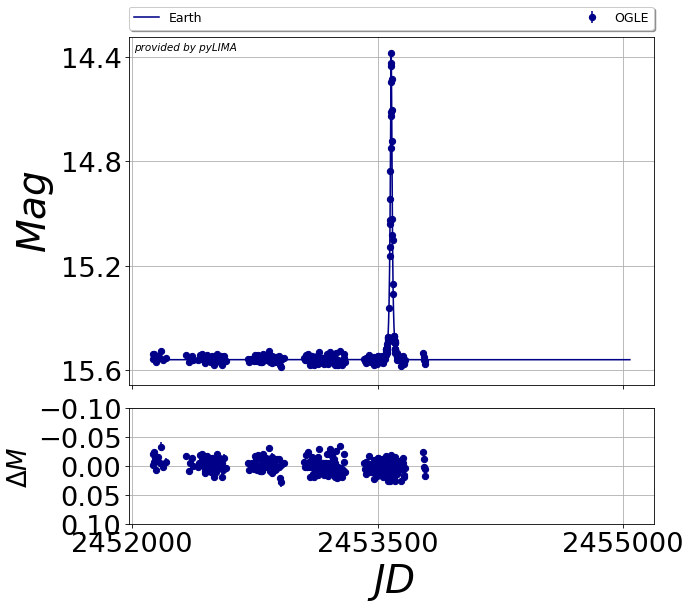

In [131]:
pyLIMA_plots.plot_lightcurves(eventModel, eventFit.fit_results['best_model'])
plt.show()

## Model 2: DE Fit

In [132]:
from pyLIMA.fits import DE_fit

In [133]:
eventFit2 = DE_fit.DEfit(eventModel) # from pyLIMA
eventFit2.fit()
fitResults2 = eventFit2.fit_results
print(fitResults2)
print('\nFit Results:\nFit Parameters:\n\tt0 (days) = {}\n\tu0 (angular Einstein ring radius) = {}\n\ttE (days) = {}'.format(fitResults2['best_model'][0], fitResults2['best_model'][1], fitResults2['best_model'][2])) # dictionary

DE converge to objective function : f(x) =  3999.909069781269
DE converge to parameters : =  ['2453582.751909545' '0.33441133420866975' '11.656112790688525']
fit  : Differential Evolution fit SUCCESS
best_model: [2.45358275e+06 3.34411334e-01 1.16561128e+01] likelihood 3999.909069781269
{'best_model': array([2.45358275e+06, 3.34411334e-01, 1.16561128e+01]), 'likelihood': 3999.909069781269, 'fit_time': 5.635993957519531, 'DE_population': array([[ 2.45274757e+06,  4.14129591e-01,  6.55925140e+01,
        -3.58974243e+03,  6.12560473e+04,  6.02198181e+05],
       [ 2.45286654e+06,  2.96825719e-01,  1.80283029e+02,
        -2.19453214e+03,  6.02116407e+04,  5.98858027e+05],
       [ 2.45337415e+06,  7.47399144e-01,  1.61374609e+02,
        -2.04652521e+03,  5.98281599e+04,  6.03705928e+05],
       ...,
       [ 2.45358275e+06,  3.30040309e-01,  1.17869351e+01,
         4.90794114e+04,  5.28525058e+03,  4.00161174e+03],
       [ 2.45358274e+06,  3.32447059e-01,  1.16938771e+01,
         4.9

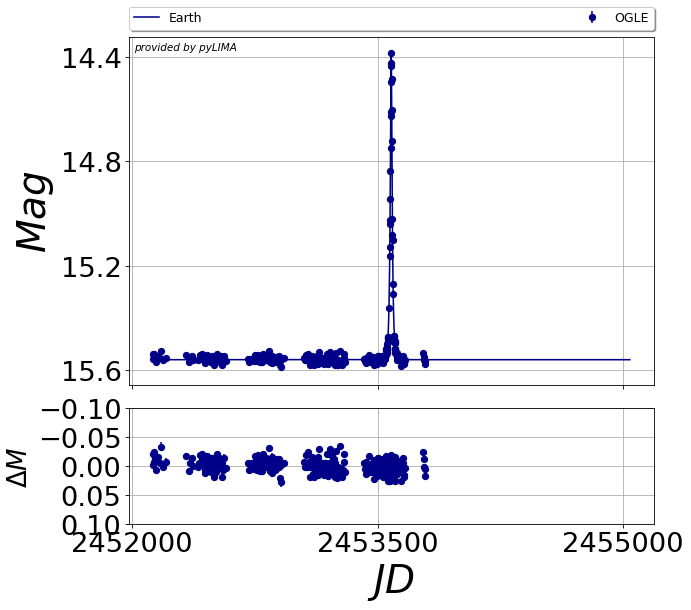

In [134]:
plot = pyLIMA_plots.plot_lightcurves(eventModel, fitResults2['best_model'])

## Agreement Test

In [135]:
def agree(value1, value2, error1, error2):
    v1 = abs(value1 - value2)
    v2 = 2 * ((error1**2 + error2**2) ** 0.5)
    
    if v1 < v2 or v1 == v2:
        return True
    else:
        return False

### Model 3: TRF Fit

In [136]:
#pyLIMA_fancy_parameters.standard_fancy_parameters
#myEvent.telescopes[0].ld_gamma = 0.5

In [137]:
#tEpars = {'log_tE': 'tE'}
#fsplModel = FSPL_model.FSPLmodel(myEvent, fancy_parameters=tEpars)

In [138]:
#def t_star(x):
#    return x.rho * x.tE

#setattr(pyLIMA_fancy_parameters, 't_star', t_star)

In [139]:
#guess_parameters = [2453582.7535683196, 0.33433623141582525, np.log10(11.646960330133595), 0.023]

In [140]:
#from pyLIMA.fits import TRF_fit
#modelFit3 = TRF_fit.TRFfit(fsplModel)
#modelFit3.model_parameters_guess = guess_parameters
#modelFit3.fit()

In [141]:
#pyLIMA_plots.plot_lightcurves(fsplModel, modelFit3.fit_results['best_model'])
#plt.show()

In [142]:
#def t_star(x):
#    return x.rho * x.tE

#setattr(pyLIMA_fancy_parameters, 't_star', t_star)

#def tE(x):
#    return x.t_star/10**(x.log_rho)

#setattr(pyLIMA_fancy_parameters, 'tE', tE)

In [143]:
#dir(pyLIMA_fancy_parameters)

In [144]:

#print("fit results: ", my_fit2.fit_results['best_model'])
#print("chi2: ", my_fit2.fit_results['chi2'])
#my_fit2.fit_parameters.keys()


In [145]:
# Both models agree; same parameters. Now that we have values for t0, u0, and tE, can move on...

# Calculating Mass Ratio

#### The mass ratio is equal to the equaiton:
### q = (Planet Einstein Timescale/Einstein Timescale)^2 = (tp/tE)^2
#### The Planet Einstein Timescale is related to the full width half maximum of the planetary deviation curve. This value can be found according by finding the time it takes for the light magnitude to return to half of its max value.

In [146]:
# at t0, reaches max magnitude (impact parameter is u0). Reaches radius = r (of einstein ring) at tE.

In [147]:
# first need to find max magnitude
minValue = m[0]
for i in m:
    if i < minValue:
        minValue = i
maxValue = m[0]
for i in m:
    if i > maxValue:
        maxValue = i

halfAmp = maxValue - ((maxValue - minValue) / 2)

13.880000000353903


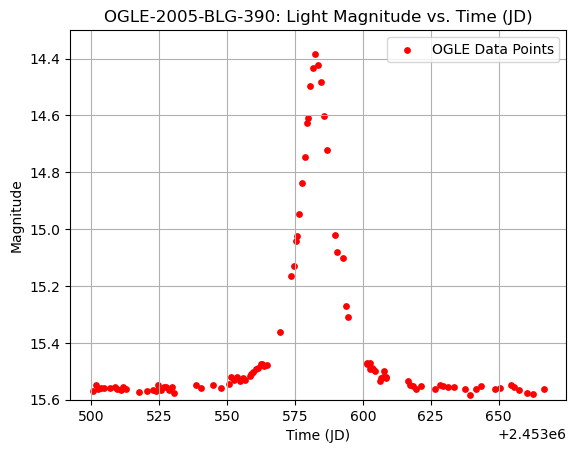

In [148]:
start_time = 2453500
stop_time = 2453750
in_range = (t >= start_time) & (t <= stop_time)
time, mag, mag_error = t[in_range], m[in_range], m_error[in_range] # makes time limits

plt.figure()
plt.grid()
plt.ylim(15.6, 14.3)
plt.title('OGLE-2005-BLG-390: Light Magnitude vs. Time (JD)')
plt.xlabel('Time (JD)')
plt.ylabel('Magnitude')

halfAmpLine = np.linspace(halfAmp, halfAmp, time.size)

plt.scatter(time, mag, s=15, color='red', label='OGLE Data Points')
tp = 2453589.64 - 2453575.76
print(tp)

plt.legend()
plt.show()

In [149]:
print((((tp - 2453582.7513251393) / 11.645304885118838) / 11.645304885118838) ** 2)




print((tp / 11.645304885118838) ** 2)


327335458.83554184
1.420617648753536


In [150]:
q = 7.6 * (10 ** -5)
print(q)

7.6e-05
